In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jsonschema.exceptions import best_match

In [13]:
import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)

In [25]:
# 데이터 구조 확인
pokemon_df = pd.read_csv('data/Pokemon.csv')
display(pokemon_df.head())
print(pokemon_df.shape) # (800, 13)
pokemon_df.describe()
pokemon_df.describe(include='object')

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


(800, 13)


,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Skrelp,Water,Flying
freq,1,112,97


- `#` : 각 포켓몬의 아이디(번호)
- Name : 포켓몬 이름
- Type 1 : 첫 번째 속성
- Type 2 : 두 번째 속성, 386개 NaN
- Total : 아래의 6개의 스텟의 합계
- HP : 체력
- Attack : 공격력
- Defense : 방어력
- SP Atk : 특수 공격 스킬
- SP Def : 특수 공격에 대한 방어력
- Speed : 공격 속도 - 선제공격
- Generation : 포켓몬 세대, 총 6세대까지
- Legendary : 전설의 포켓몬 여부(bool)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
386
0      False
1      False
2      False
3       True
4      False
       ...  
795    False
796     True
797    False
798     True
799    False
Length: 800, dtype: bool


<Axes: >

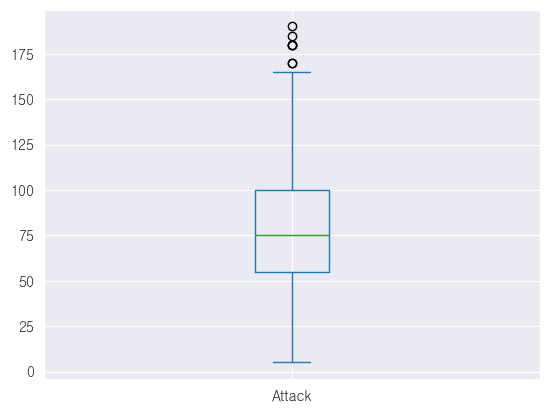

In [55]:
# 데이터 결측치 확인
pokemon_df.info()
print(pokemon_df['Type 2'].isna().sum()) # Type 2 386개

# 데이터 중복값
print(pokemon_df.duplicated('#')) # 포켓몬의 id가 중복 79개

# 데이터 이상치
# 포켓몬에게 이상치 스탯은 강점과 스킬이 된다
pokemon_df['Attack'].plot(kind='box')

In [31]:
# # : id number
len(set(pokemon_df['#']))
pokemon_df[pokemon_df['#']==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [32]:
# Name
len(set(pokemon_df['Name']))

800

In [153]:
# Type 1, 2 18개
display(pokemon_df.loc[[6, 10]])
pokemon_df['Type 1'].value_counts()
pokemon_df['Type 2'].value_counts()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

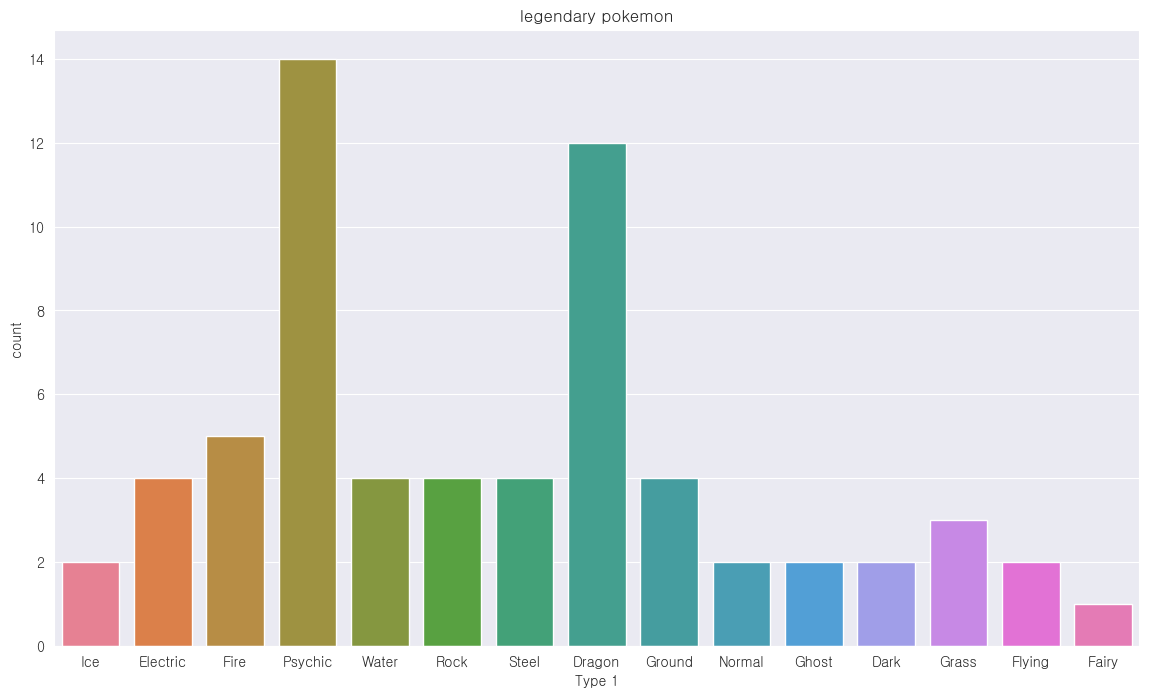

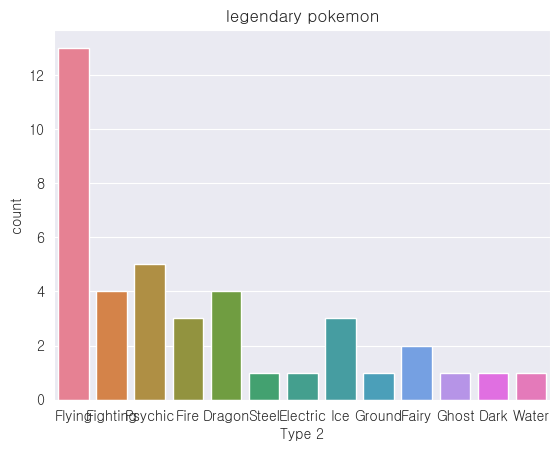

In [76]:
# Type 1 데이터 분포
plt.figure(figsize=(14,8))

# plt.subplot(211)
sns.countplot(data = pokemon_df[pokemon_df['Legendary']], x = 'Type 1', hue='Type 1', legend=False)
plt.title('legendary pokemon')
plt.show()

# plt.subplot(211)
sns.countplot(data = pokemon_df[pokemon_df['Legendary']], x = 'Type 2', hue='Type 2', legend=False)
plt.title('legendary pokemon')
plt.show()

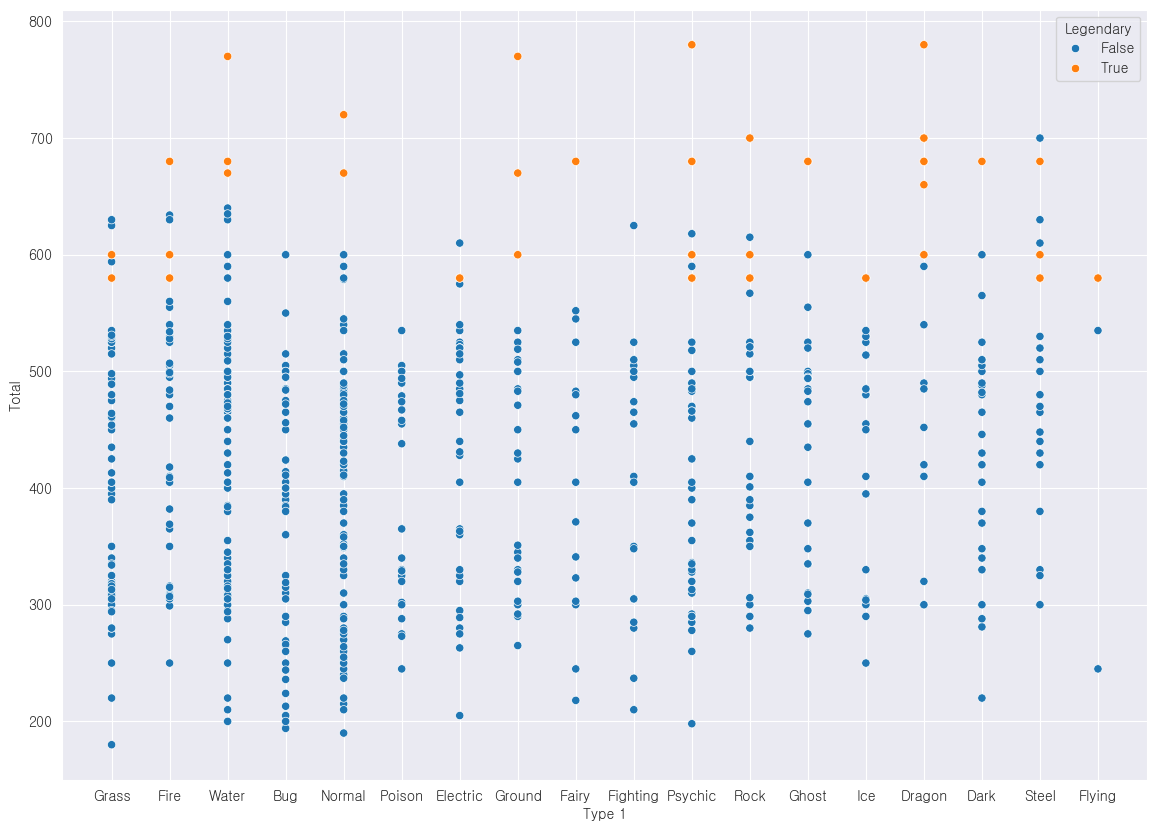

<Axes: xlabel='Speed', ylabel='Total'>

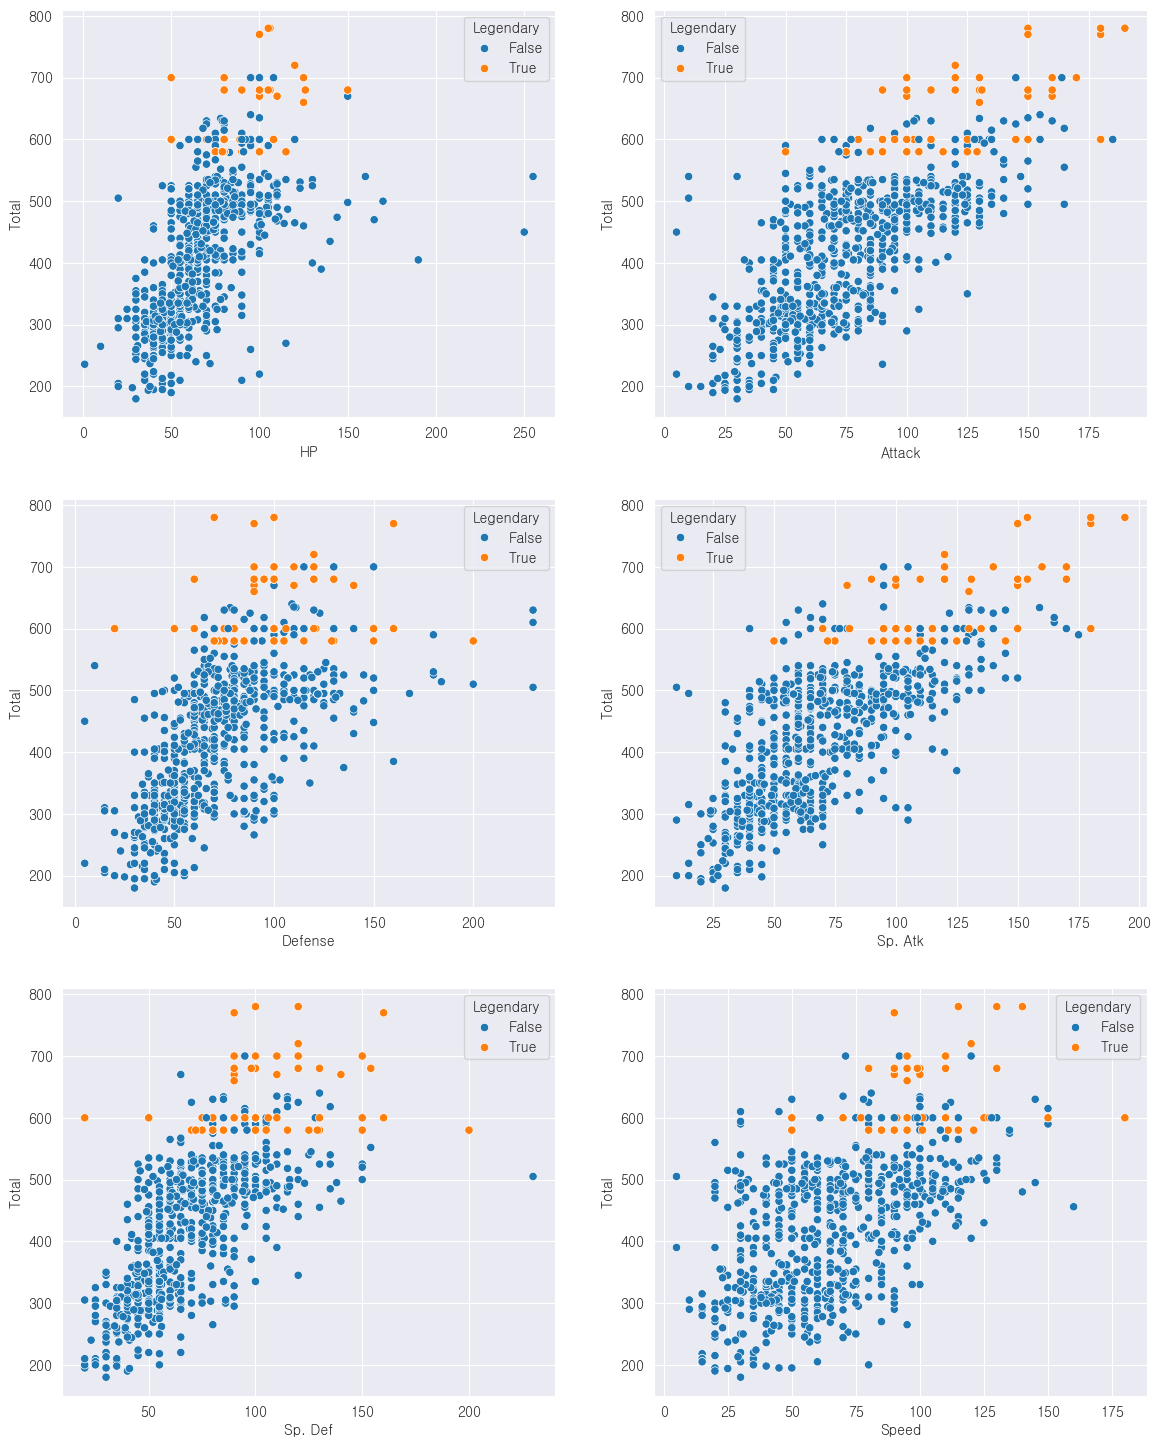

In [91]:
# 스탯 비교
plt.figure(figsize=(14,10))
sns.scatterplot(data=pokemon_df, x='Type 1', y='Total', hue='Legendary')
plt.show()

fig, ax = plt.subplots(3, 2, figsize=(14, 18))
sns.scatterplot(data=pokemon_df, x='HP', y='Total', hue='Legendary', ax=ax[0][0])
sns.scatterplot(data=pokemon_df, x='Attack', y='Total', hue='Legendary', ax=ax[0][1])
sns.scatterplot(data=pokemon_df, x='Defense', y='Total', hue='Legendary', ax=ax[1][0])
sns.scatterplot(data=pokemon_df, x='Sp. Atk', y='Total', hue='Legendary', ax=ax[1][1])
sns.scatterplot(data=pokemon_df, x='Sp. Def', y='Total', hue='Legendary', ax=ax[2][0])
sns.scatterplot(data=pokemon_df, x='Speed', y='Total', hue='Legendary', ax=ax[2][1])

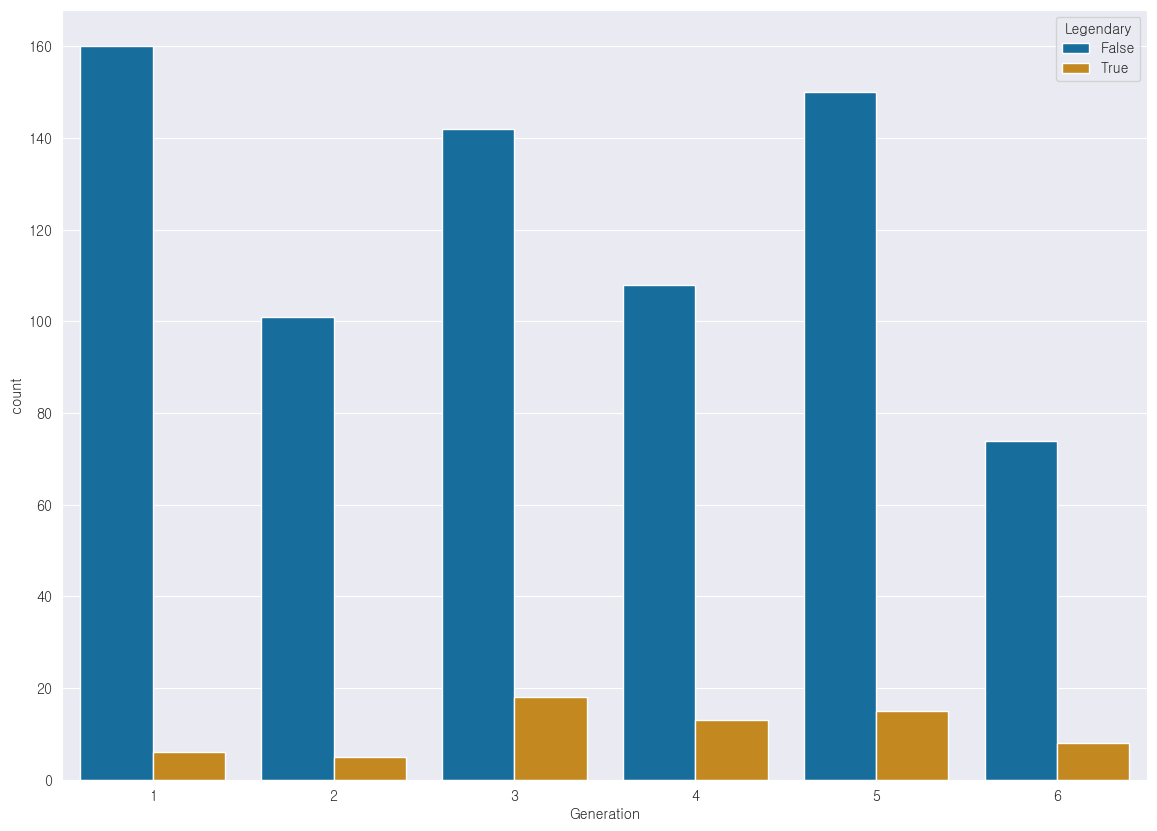

In [151]:
# 세대별 포켓몬
# 세대별 포켓몬의 특성

plt.figure(figsize=(14,10))
sns.countplot(data=pokemon_df, x='Generation', hue='Legendary', palette='colorblind')
plt.xlabel('Generation')
plt.show()

In [119]:
pokemon_df.groupby('Generation')['HP'].count()

Generation
1    166
2    106
3    160
4    121
5    165
6     82
Name: HP, dtype: int64